In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
import pyregion
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

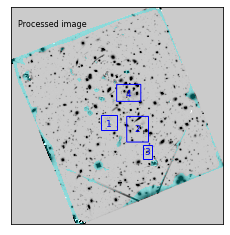

In [8]:
fig, ax = plt.subplots()
data=fits.open('f160w_icl_bcg_out_detection.fits')[0].data
hdr=fits.open('f160w_icl_bcg_out_detection.fits')[0].header
hdu=fits.open('background.fits')[0]
bkg=hdu.data
r = pyregion.open('combined_residual.reg')
bkg[r.get_mask(hdu=hdu)]=1
masked=np.ma.masked_where(bkg==0,bkg)
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower')
ax.imshow(masked,alpha=0.3,cmap='cool',origin='lower')
ax.text(100,2650,'Processed image',fontsize=8)
ax.text(1280,1310,'1',fontsize=9,color='b')
ax.text(1650,1238,'2',fontsize=9,color='b')
ax.text(1790,930,'3',fontsize=9,color='b')
ax.text(1530,1710,'4',fontsize=9,color='b')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
box=pyregion.open('special_box_wcs.reg').as_imagecoord(hdr)
patch_list,text_list = box.get_mpl_patches_texts()
for p in patch_list:
 ax.add_patch(p)
for t in text_list:
 ax.add_artist(t)
plt.savefig('catalog_fig1.jpg',dpi=150)